_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 3, 4, 32)          320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 1, 2, 16)          4624      
_________________________________________________________________
flatten_10 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              33792     
_________________________________________________________________
dropout_20 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
__________

10047/10047 [==============================] - 2s 161us/step - loss: 1.0557 - acc: 0.6406
Epoch 65/200
10047/10047 [==============================] - 2s 164us/step - loss: 1.0559 - acc: 0.6439
Epoch 66/200
10047/10047 [==============================] - 2s 166us/step - loss: 1.0033 - acc: 0.6598
Epoch 67/200
10047/10047 [==============================] - 2s 164us/step - loss: 1.0261 - acc: 0.6439
Epoch 68/200
10047/10047 [==============================] - 2s 165us/step - loss: 1.0015 - acc: 0.6566
Epoch 69/200
10047/10047 [==============================] - 2s 164us/step - loss: 0.9972 - acc: 0.6542
Epoch 70/200
10047/10047 [==============================] - 2s 165us/step - loss: 0.9825 - acc: 0.6590
Epoch 71/200
10047/10047 [==============================] - 2s 163us/step - loss: 0.9552 - acc: 0.6697
Epoch 72/200
10047/10047 [==============================] - 2s 165us/step - loss: 0.9387 - acc: 0.6756
Epoch 73/200
10047/10047 [==============================] - 2s 166us/step - loss: 0.95

10047/10047 [==============================] - 2s 164us/step - loss: 0.5393 - acc: 0.7973
Epoch 144/200
10047/10047 [==============================] - 2s 162us/step - loss: 0.5525 - acc: 0.7951
Epoch 145/200
10047/10047 [==============================] - 2s 164us/step - loss: 0.5534 - acc: 0.7974
Epoch 146/200
10047/10047 [==============================] - 2s 161us/step - loss: 0.5602 - acc: 0.7940
Epoch 147/200
10047/10047 [==============================] - 2s 167us/step - loss: 0.5455 - acc: 0.8000
Epoch 148/200
10047/10047 [==============================] - 2s 166us/step - loss: 0.5369 - acc: 0.8028
Epoch 149/200
10047/10047 [==============================] - 2s 160us/step - loss: 0.5323 - acc: 0.8021
Epoch 150/200
10047/10047 [==============================] - 2s 162us/step - loss: 0.5166 - acc: 0.8067
Epoch 151/200
10047/10047 [==============================] - 2s 163us/step - loss: 0.5396 - acc: 0.8032
Epoch 152/200
10047/10047 [==============================] - 2s 158us/step - l

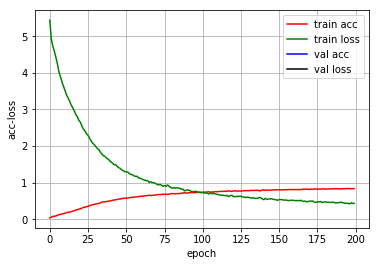

In [31]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras import optimizers
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
import utm
import math

def Dist_Error(pred,real):
    errors=np.abs(pred-real)
    result=[math.sqrt(math.pow(i[0],2)+math.pow(i[1],2))for i in errors]
    return result

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch': []}
        self.accuracy = {'batch': [], 'epoch': []}
        self.val_loss = {'batch': [], 'epoch': []}
        self.val_acc = {'batch': [], 'epoch': []}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()


data = pd.read_csv('trainfix.csv')
X = [
    np.array([[mr[4:9],
               mr[9:14],
               mr[14:19],
               mr[19:24],
               mr[24:29],
               mr[29:34]]]).T for mr in data.values
]
X = np.array(X)
zone_number = 51
zone_letter = 'R'
label = pd.read_csv('label1.csv').values
y = []
for i, l in enumerate(label):
    temp = [0 for j in range(891)]
    temp[l[1]] = 1
    y.append(temp)
y = np.array(y)

history = LossHistory()

def build_model():
    m = Sequential()
    m.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(5, 6, 1)))
    m.add(Conv2D(16, kernel_size=3, activation='relu'))
    m.add(Flatten())
    m.add(Dense(1024, activation='relu'))
    m.add(Dropout(0.2))
    m.add(Dense(512, activation='relu'))
    m.add(Dropout(0.2))
    m.add(Dense(512, activation='relu'))
    m.add(Dropout(0.2))
    m.add(Dense(891, activation='softmax'))
    r = optimizers.Adam(lr=0.001, decay=0.00001)
    m.compile(optimizer=r, loss='categorical_crossentropy', metrics=['accuracy'])
    return m

y_real = []
zone_number = 0
zone_letter = 0
for mr in data.values:
    lat, lon, zone_number, zone_letter = utm.from_latlon(mr[-4], mr[-5])
    y_real.append([lat, lon])

# X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
# _, _, _, y_test_real = train_test_split(X, y_real, test_size=0.2, random_state=33)
model = build_model()
model.summary()
model.fit(X, y, epochs=200, batch_size=64,
              callbacks=[history])
history.loss_plot('epoch')

In [29]:
grid = pd.read_csv('grid1.csv').values
y_pred = model.predict_classes(X_test)
y_final = [[grid[u][1], grid[u][2]] for u in y_pred]

In [30]:
errors=Dist_Error(np.array(y_final),np.array(y_test_real))
errors=np.array(errors)
print(np.median(errors))
print(np.mean(errors))
print(np.sort(errors)[int(len(errors)*0.9)])

24.066227454845617
59.77612740459058
108.14002709652033


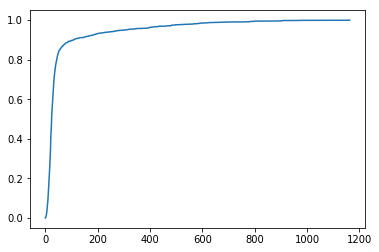

In [32]:
x = np.arange(0,np.max(errors))
error_y = [len(errors[errors < i])/len(errors) for i in x]
plt.plot(x, error_y)

In [33]:
grid = pd.read_csv('grid1.csv').values
test_data = pd.read_csv('testfix.csv')
test_X = [
    np.array([[mr[4:9],
               mr[9:14],
               mr[14:19],
               mr[19:24],
               mr[24:29],
               mr[29:34]]]).T for mr in test_data.values
]
test_X = np.array(test_X)
test_y = model.predict_classes(test_X)
y_final = [list(utm.to_latlon(grid[i][1], grid[i][2], zone_letter=zone_letter, zone_number=zone_number)) for i in test_y]
y_final = np.array(y_final)
df_pred = pd.DataFrame(data={'Longitude':y_final[:,1], 'Latitude':y_final[:,0]})
df_pred.to_csv('pred2.csv', index=False)